Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 14, 14, 6)         0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 6)         906       
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 7, 7, 6)           0         
 ng2D)                                                           
                                                                 
 flatten_5 (Flatten)         (None, 294)               0         
                                                                 
 dense_10 (Dense)            (None, 64)               

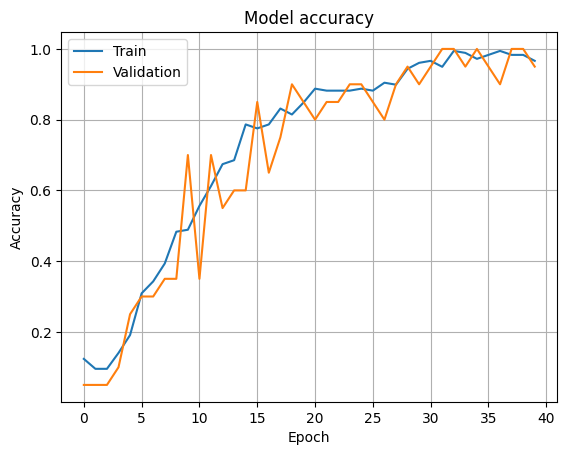

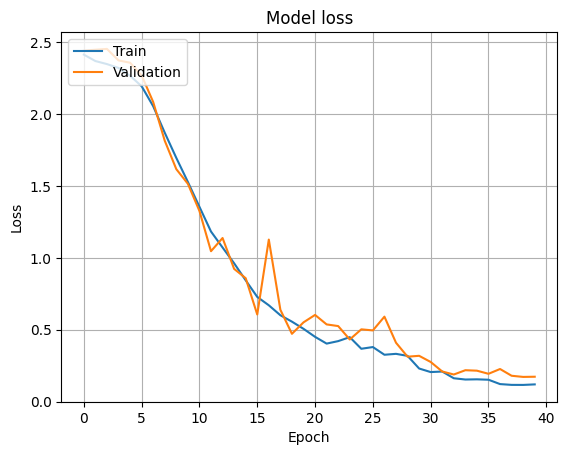

Loss: 0.173641175031662 （損失関数値 - 0に近いほど正解に近い）
Accuracy: 94.9999988079071 % （精度 - 100% に近いほど正解に近い）
Computation time（計算時間）:11.729 sec（秒）


In [ ]:
#1 ライブラリのインポート
import keras
import glob
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import load_img, img_to_array
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam # 「tensorflow.」を追加
import matplotlib.pyplot as plt
import time
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import os
import cv2


#2 各種設定


image_width = 28
image_height = 60
color_setting = 1

# folder = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'blank'] #
folder = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'b'] #クラス名
class_number = len(folder)


#3 データセットの読み込みとデータ形式の設定・正規化・分割


image_folder = "test_images"
#データ構造はtest_images/0-0.png..
#                        /0-1.png...となる
img_path = glob.glob(image_folder+"/*.png")

X_image = []
Y_label = []

X_image_r = []
Y_label_r = []

#ブランク画像
height = 60
width = 60
blank = np.zeros((height, width))

dx = 15
dy = 0
h,w = 60,28

# データ拡張のための設定
datagen = ImageDataGenerator(
    rotation_range=0,  # 回転の範囲
    width_shift_range=0.1,  # 幅方向へのシフトの範囲
    height_shift_range=0.1,  # 高さ方向へのシフトの範囲
    shear_range=0,  # シアー変換の強度
    zoom_range=0,  # ランダムにズームする範囲
    horizontal_flip=False,  # 水平方向に反転
    fill_mode='nearest'  # 新しく生成されたピクセルの埋め方
)

for image in img_path :
    if color_setting == 1:
      img = load_img(image, color_mode = 'grayscale' ,target_size=(image_height, image_width))
    elif color_setting == 3:
      img = load_img(image, color_mode = 'rgb' ,target_size=(image_height, image_width))

    blank = np.zeros((height, width))
    blank[dy:dy+h,dx:dx+w] = img
    blank = cv2.resize(blank, (28, 28))

    array = img_to_array(blank)
    X_image.append(array)
    index = folder.index(image[12:13])
    Y_label.append(index)
    #データ拡張を行いたい場合は以下を有効にする
    # x = array.reshape((1,) + array.shape)
    # x = datagen.flow(x, batch_size=1)[0]
    # x = np.array(x)
    # x = np.squeeze(x,axis = 0)
    # x = np.squeeze(x,axis = 2)
    # array = img_to_array(x)
    # X_image.append(array)
    # Y_label.append(index)

X_image = np.array(X_image)
Y_label = np.array(Y_label)

X_image = X_image.astype('float32') / 255
Y_label = to_categorical(Y_label, class_number)

train_images, valid_images, train_labels, valid_labels = train_test_split(X_image, Y_label, test_size=0.1)
x_train = train_images
y_train = train_labels
x_test = valid_images
y_test = valid_labels


#4 モデルの作成

model = Sequential()


model.add(Conv2D(6, (5, 5), padding='same',
          input_shape=(28, 28, color_setting), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(6, (5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.25))
model.add(Dense(class_number, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

start_time = time.time()

#学習
history = model.fit(x_train,y_train, batch_size=10, epochs=40, verbose=1, validation_data=(x_test, y_test))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

score = model.evaluate(x_test, y_test, verbose=0)
print('Loss:', score[0], '（損失関数値 - 0に近いほど正解に近い）')
print('Accuracy:', score[1] * 100, '%', '（精度 - 100% に近いほど正解に近い）')
print('Computation time（計算時間）:{0:.3f} sec（秒）'.format(time.time() - start_time))


# 学習済みモデルの保存

model.save('model.h5')

# テスト


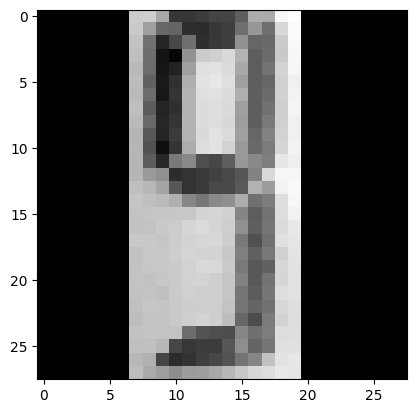

1/1 [==============================] - 0s 101ms/step
画像認識AIは「 0 」の確率を 0 % と予測しました。
画像認識AIは「 1 」の確率を 0 % と予測しました。
画像認識AIは「 2 」の確率を 0 % と予測しました。
画像認識AIは「 3 」の確率を 0 % と予測しました。
画像認識AIは「 4 」の確率を 3 % と予測しました。
画像認識AIは「 5 」の確率を 9 % と予測しました。
画像認識AIは「 6 」の確率を 0 % と予測しました。
画像認識AIは「 7 」の確率を 0 % と予測しました。
画像認識AIは「 8 」の確率を 0 % と予測しました。
画像認識AIは「 9 」の確率を 87 % と予測しました。
画像認識AIは「  」の確率を 0 % と予測しました。
-------------------------------------------------------
予測結果は、「 9 」です。
 

　＊　「確率精度が低い画像」や、「間違えた画像」を再学習させて、オリジナルのモデルを作成してみてください。
 
　＊　「間違えた画像」を数枚データセットに入れるだけで正解できる可能性が向上するようでした。
 
　＊　「0」と「」（blank）の認識で迷う傾向があるようです。


In [ ]:
#1 ライブラリのインポート等

from keras.models import load_model
import cv2
import matplotlib.pyplot as plt
import numpy as np


#2 各種設定

image = '9.png' #ここを変更。画像認識したい画像ファイル名。（実行前に認識したい画像ファイルを1つアップロードしてください）
folder = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '']  # 空白の表示に対応させるため、blankのところを「' '」で空白に設定
#3 各種読み込み

model = load_model('model.h5')
#ブランク画像
height = 60
width = 60
blank = np.zeros((height, width))

dx = 15
dy = 0
h,w = 60,28

#4 画像の表示・各種設定等


img = load_img(image, color_mode = 'grayscale' ,target_size=(60, 28))

blank = np.zeros((height, width))
blank[dy:dy+h,dx:dx+w] = img
blank = cv2.resize(blank, (28, 28))


plt.imshow(blank)
plt.gray()  #ここを変更。カラーの場合は「plt.gray()」を消す。モノクロ・グレースケールの場合は「plt.gray()」が無いと変な色になります。
plt.show()

blank = blank.astype('float32')/255

#5 予測と結果の表示等

prediction = model.predict(np.array([blank]))
result = prediction[0]

for i, accuracy in enumerate(result):
  print('画像認識AIは「', folder[i], '」の確率を', int(accuracy * 100), '% と予測しました。')

print('-------------------------------------------------------')
print('予測結果は、「', folder[result.argmax()],'」です。')
print(' \n\n　＊　「確率精度が低い画像」や、「間違えた画像」を再学習させて、オリジナルのモデルを作成してみてください。')
print(' \n　＊　「間違えた画像」を数枚データセットに入れるだけで正解できる可能性が向上するようでした。')
print(' \n　＊　「0」と「」（blank）の認識で迷う傾向があるようです。')